In [1]:
import keras

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
mnist.load_data()
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
print('train_images dimentions:',train_images.ndim)
print('train_images shape :',train_images.shape)
print('train_images type:',train_images.dtype)

train_images dimentions: 3
train_images shape : (60000, 28, 28)
train_images type: uint8


In [4]:
x_train=train_images.reshape(60000,784)

In [5]:
x_test=test_images.reshape(10000,784)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train/=255
x_test/=255

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

# creatin our model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

In [11]:
myModel = Sequential()
myModel.add(Dense(500,activation=relu,input_shape=(784,)))
myModel.add(Dense(100,activation=relu))
myModel.add(Dense(10,activation='softmax'))

In [12]:
myModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
myModel.compile(optimizer=SGD(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

# train our model

In [14]:
network_history=myModel.fit(x_train,y_train,batch_size=128,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 8s 135us/step - loss: 2.1750 - acc: 0.2225
Epoch 2/2
60000/60000 [==============================] - 5s 89us/step - loss: 1.8196 - acc: 0.5408


In [15]:
network_history=myModel.fit(x_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 6s 95us/step - loss: 1.4786 - acc: 0.7238
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 1.1859 - acc: 0.7854
Epoch 3/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.9724 - acc: 0.8129
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.8283 - acc: 0.8286
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.7293 - acc: 0.8405
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.6584 - acc: 0.8494
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.6054 - acc: 0.8574
Epoch 8/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.5642 - acc: 0.8638
Epoch 9/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.5314 - acc: 0.8688
Epoch 10/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.5045 - acc: 0.8734

In [16]:
type(network_history)

keras.callbacks.History

In [17]:
history=network_history.history

In [18]:
type(history)

dict

In [19]:
history.keys()

dict_keys(['loss', 'acc'])

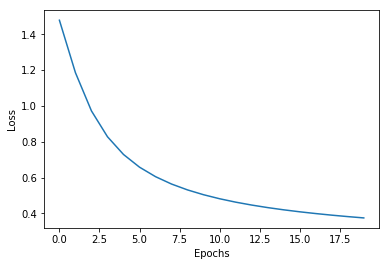

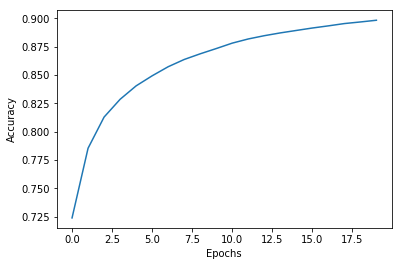

In [22]:
import matplotlib.pyplot as plt
losses = history['loss']
accuracies=history['acc']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)

plt.figure()


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)

In [28]:
def plot_history1(net_history):
    history=net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    accuracies=history['acc']
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)

    plt.figure()


    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)

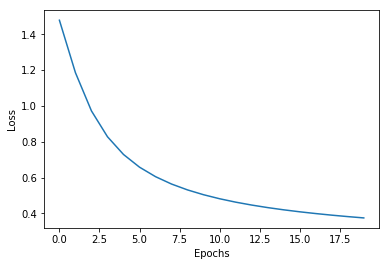

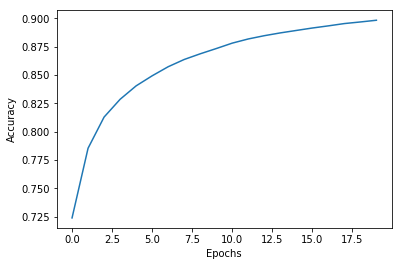

In [30]:
plot_history1(network_history)

# validation

In [31]:
network_history=myModel.fit(x_train,y_train,batch_size=128,epochs=20,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 89us/step - loss: 0.3747 - acc: 0.8977 - val_loss: 0.3438 - val_acc: 0.9077
Epoch 2/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.3694 - acc: 0.8992 - val_loss: 0.3395 - val_acc: 0.9083
Epoch 3/20
48000/48000 [==============================] - 4s 89us/step - loss: 0.3645 - acc: 0.8997 - val_loss: 0.3352 - val_acc: 0.9099
Epoch 4/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.3599 - acc: 0.9009 - val_loss: 0.3313 - val_acc: 0.9110
Epoch 5/20
48000/48000 [==============================] - 5s 103us/step - loss: 0.3554 - acc: 0.9017 - val_loss: 0.3277 - val_acc: 0.9102
Epoch 6/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.3513 - acc: 0.9027 - val_loss: 0.3243 - val_acc: 0.9112
Epoch 7/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.3474 - acc: 0.9038 - val_loss: 0.3208 - val_ac

In [32]:
history=network_history.history

In [33]:
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [35]:
def plot_history2(net_history):
    history=net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies=history['acc']
    val_accuracies=history['val_acc']
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss','val_loss'])

    plt.figure()


    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc','val_acc'])

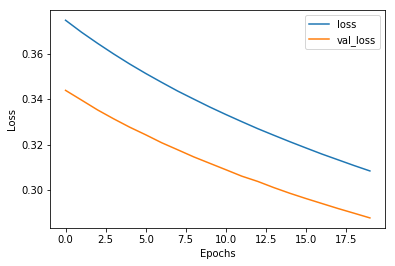

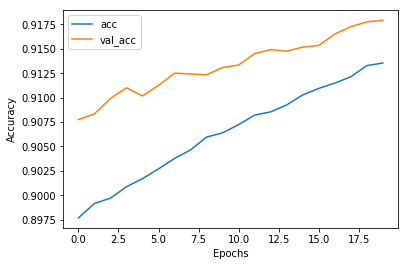

In [36]:
plot_history2(network_history)

# dropout

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.activations import relu
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

In [38]:
myModel = Sequential()
myModel.add(Dense(500,activation=relu,input_shape=(784,)))
myModel.add(Dropout(0.2))
myModel.add(Dense(100,activation=relu))
myModel.add(Dropout(0.2))
myModel.add(Dense(10,activation='softmax'))

In [39]:
myModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
myModel.compile(optimizer=SGD(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

In [41]:
network_history=myModel.fit(x_train,y_train,batch_size=128,epochs=20,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 109us/step - loss: 2.2202 - acc: 0.2044 - val_loss: 2.0586 - val_acc: 0.4484
Epoch 2/20
48000/48000 [==============================] - 5s 98us/step - loss: 1.9938 - acc: 0.3989 - val_loss: 1.8184 - val_acc: 0.6153
Epoch 3/20
48000/48000 [==============================] - 5s 98us/step - loss: 1.7708 - acc: 0.5296 - val_loss: 1.5710 - val_acc: 0.7080
Epoch 4/20
48000/48000 [==============================] - 5s 100us/step - loss: 1.5535 - acc: 0.6093 - val_loss: 1.3390 - val_acc: 0.7678
Epoch 5/20
48000/48000 [==============================] - 5s 98us/step - loss: 1.3613 - acc: 0.6604 - val_loss: 1.1419 - val_acc: 0.8021
Epoch 6/20
48000/48000 [==============================] - 5s 99us/step - loss: 1.2009 - acc: 0.6967 - val_loss: 0.9852 - val_acc: 0.8233
Epoch 7/20
48000/48000 [==============================] - 5s 101us/step - loss: 1.0728 - acc: 0.7238 - val_loss: 0.8645 - val_

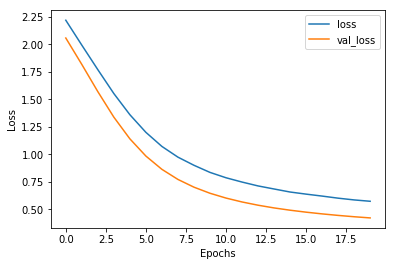

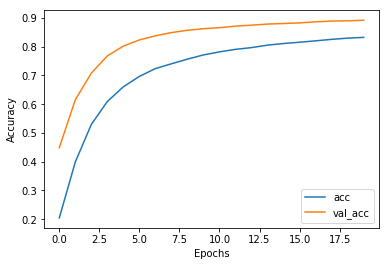

In [42]:
plot_history2(network_history)

# Evaluation

In [44]:
test_loss,test_acc = myModel.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 64us/step


In [45]:
test_loss

0.42674644391536715

In [46]:
test_acc

0.889

In [47]:
test_labels_p=myModel.predict(x_test)

In [48]:
test_labels_p

array([[7.8462623e-04, 2.0308410e-04, 5.4637017e-04, ..., 9.8453379e-01,
        6.2162551e-04, 8.2491674e-03],
       [6.5030284e-02, 1.6497361e-03, 7.5522935e-01, ..., 4.3782282e-05,
        3.9721500e-02, 3.7580612e-04],
       [1.7373220e-03, 9.0463960e-01, 2.1865347e-02, ..., 1.2080140e-02,
        1.7113905e-02, 1.0541014e-02],
       ...,
       [7.1702794e-05, 2.7881266e-04, 5.2248064e-04, ..., 1.0041966e-02,
        2.8519351e-02, 1.7292377e-01],
       [1.3550861e-02, 4.0250126e-02, 2.5337717e-02, ..., 9.3857758e-03,
        4.2889619e-01, 2.7321076e-02],
       [1.3656525e-03, 8.7820390e-06, 4.8395996e-03, ..., 1.9136467e-06,
        1.3539694e-04, 4.0298604e-05]], dtype=float32)

In [49]:
import numpy as np

In [50]:
test_labels_p=np.argmax(test_labels_p,axis=1)

In [51]:
test_labels_p

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [52]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# change layers

In [54]:
myModel.layers[0]

In [55]:
myModel.layers[0].name = 'layer_0'

In [58]:
myModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_0 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [59]:
myModel.layers[0].trainable = False

In [60]:
myModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_0 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 836,110
Trainable params: 443,610
Non-trainable params: 392,500
_________________________________________________________________


C:\Users\User\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [61]:
myModel.layers[0].get_config()

{'name': 'layer_0',
 'trainable': False,
 'batch_input_shape': (None, 784),
 'dtype': 'float32',
 'units': 500,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}